In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats

In [2]:
df = pd.read_csv('full.csv')
df = df[df['isMainSleep'] == 1]

In [78]:
len(df.participID.unique())

195

## Efficiency
This notebook will focus on the "efficiency" metric given by Fitbit, since it is a measure of sleep quality that is able to be aggregated and averaged (unlike bedtime/wakeup time). According to the Fitbit community page, efficiency is calculated by the following:


efficiency = time asleep / (total time in bed - time to fall asleep)

In [3]:
eff = df['efficiency']

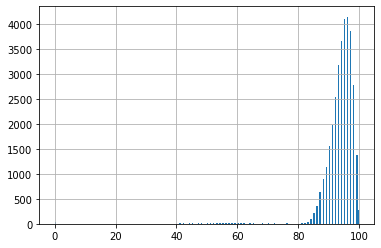

In [4]:
eff.hist(bins = 200);

## Histogram
This is a distribution of all efficiency scores from August to May of the academic year 2015-2016. The distribution is centered around 95-96% efficiency. Although efficiency scores are shown to also commonly be closer to 100 or in the low 90%s, since they're all relatively high, is efficiency enough of a differentiating factor to analyze?

In [5]:
df['month'] = df['dataDate'].apply(lambda x: x.split('-')[1])
df.head()

,idStudy,participID,dataDate,dataTime,fetchStamp,overallResultValue,heartMinsFound,sleepMinsFound,calMinsFound,stepMinsFound,...,timeInBed,minsAsleep,awakeDuration,efficiency,restlessCount,durationMS,restlessDuration,awakeCount,minutesAfterWakeup,month
0,6178,3LZGLG,2015-08-25,00:00:00,1441145130,3,1331,440,1440,1440,...,440,423,1,97,10,26400000,16,1,0,08
1,6179,3LZGLG,2015-08-26,00:00:00,1441145132,3,1424,434,1440,1440,...,434,417,1,96,8,26040000,16,1,0,08
2,6180,3LZGLG,2015-08-27,00:00:00,1441145134,3,1412,469,1440,1440,...,469,431,2,95,12,28140000,36,1,11,08
3,6181,3LZGLG,2015-08-28,00:00:00,1441145136,3,1350,354,1440,1440,...,354,339,1,97,8,21240000,14,1,0,08
4,6182,3LZGLG,2015-08-29,00:00:00,1441145138,3,1417,502,1440,1440,...,435,376,8,90,16,26100000,51,2,0,08


In [6]:
data = {
'08': list(df[df['month'] == '08'].efficiency),
'09': list(df[df['month'] == '09'].efficiency),
'10': list(df[df['month'] == '10'].efficiency),
'11': list(df[df['month'] == '11'].efficiency),
'12': list(df[df['month'] == '12'].efficiency),
'01': list(df[df['month'] == '01'].efficiency),
'02': list(df[df['month'] == '02'].efficiency),
'03': list(df[df['month'] == '03'].efficiency),
'04': list(df[df['month'] == '04'].efficiency),
'05': list(df[df['month'] == '05'].efficiency)
       }

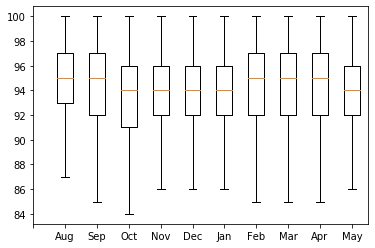

In [7]:
plt.boxplot([data['08'], data['09'], data['10'], data['11'], data['12'], data['01'], data['02'], data['03'], data['04'], data['05']], 0, '');
plt.xticks(np.arange(11), ('', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'));
plt.show()

## Boxplots
This shows the distribution of efficiency scores throughout the school year. Again, it's hard to tell if the differences seen are significant, but it does apprear that the months of October, November, and January have lower average efficiency scores. Could this have something to do with weather as a contributing factor? Perhaps people aren't as active and therefore sleep worse. Oct/Nov/Dec also show a wider range of efficiencies than the other months. 

## Connecting to Activity Level
I first tried comparing these boxplots to values from the HeartMeta table. I first plotted distributions of cardio minutes over each month, but there wasn't enough data, most months averaged around 0. I would like to connect to step count. However, unlike sleepMeta and heartMeta, which summarizes sleep and heart data into ~1 entry per person per day, the Activity table has updated timestamps every minute with new steps, and I need to figure out how to aggregate into one entry per day with total steps per person. 

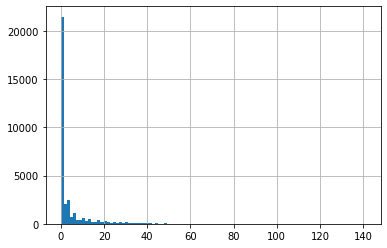

In [8]:
df['cardioMins'].hist(bins = 100)

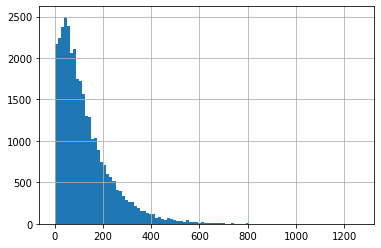

In [9]:
df['fatBurnMins'].hist(bins = 100)

In [10]:
data_fatburn = {
'08': list(df[df['month'] == '08'].fatBurnMins),
'09': list(df[df['month'] == '09'].fatBurnMins),
'10': list(df[df['month'] == '10'].fatBurnMins),
'11': list(df[df['month'] == '11'].fatBurnMins),
'12': list(df[df['month'] == '12'].fatBurnMins),
'01': list(df[df['month'] == '01'].fatBurnMins),
'02': list(df[df['month'] == '02'].fatBurnMins),
'03': list(df[df['month'] == '03'].fatBurnMins),
'04': list(df[df['month'] == '04'].fatBurnMins),
'05': list(df[df['month'] == '05'].fatBurnMins)
       }

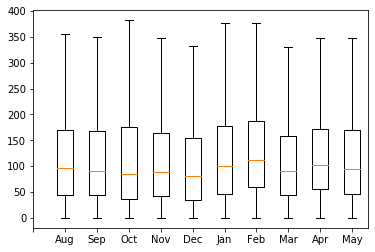

In [11]:
plt.boxplot([data_fatburn['08'], data_fatburn['09'], data_fatburn['10'], data_fatburn['11'], data_fatburn['12'], data_fatburn['01'], data_fatburn['02'], data_fatburn['03'], data_fatburn['04'], data_fatburn['05']], 0, '');
plt.xticks(np.arange(11), ('', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May'));
plt.show()

## Results
Again, it's difficult to tell how much variation is significant, but these boxplots to mirror the slight increase in efficiency from Jan to Feb and from Mar to Apr.

In [12]:
df.columns

Index(['idStudy', 'participID', 'dataDate', 'dataTime', 'fetchStamp',
       'overallResultValue', 'heartMinsFound', 'sleepMinsFound',
       'calMinsFound', 'stepMinsFound', 'lastComplyRunDate',
       'includeThreshold', 'complyPercent', 'lastSyncDate', 'lastSyncTime',
       'currentBattLevel', 'idParticip', 'username', 'pswd', 'oAuthToken',
       'oAuthSecret', 'startDate', 'inStudy', 'accessToken', 'refreshToken',
       'idHeartMeta', 'studyID_heart', 'lowRangeCal', 'lowRangeMax',
       'lowRangeMin', 'lowRangeMins', 'fatBurnCal', 'fatBurnMax', 'fatBurnMin',
       'fatBurnMins', 'cardioCal', 'cardioMax', 'cardioMin', 'cardioMins',
       'peakCal', 'peakMax', 'peakMin', 'peakMins', 'restHeart', 'idSleepMeta',
       'studyID_sleep', 'startTime', 'isMainSleep', 'minToFallAsleep',
       'numAwakeTimes', 'minsAwake', 'timeInBed', 'minsAsleep',
       'awakeDuration', 'efficiency', 'restlessCount', 'durationMS',
       'restlessDuration', 'awakeCount', 'minutesAfterWakeup', 'mont

In [13]:
df['calc'] = df.apply(lambda x: 0 if (x.minsAsleep + x.minsAwake) == 0 else x.minsAsleep/(x.minsAsleep + x.minsAwake), axis = 1)

In [14]:
df[['minToFallAsleep', 'timeInBed', 'minsAsleep', 'efficiency', 'calc']]

,minToFallAsleep,timeInBed,minsAsleep,efficiency,calc
0,0,440,423,97,0.967963
1,0,434,417,96,0.963048
2,0,469,431,95,0.947253
3,0,354,339,97,0.974138
4,0,435,376,90,0.897375
...,...,...,...,...,...
39459,0,421,385,91,0.914489
39460,0,418,379,91,0.906699
39461,0,702,622,89,0.886040
39462,0,410,380,93,0.933661


## Efficiency?
I calculated efficiency based on the formula given in the fitbit community page, and the results were different from the efficiency score. Some are off by ~1%, others off by much more (like the 90% vs. 86%). I got matching efficiency calculations by doing Mins Asleep / (min asleep + mins awake), so how much of your "sleeping time" was spent in a sleep stage vs awake

## Doing Histograms by Week instead of Month

In [15]:
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [16]:
y = df.pivot(columns='week_start', values='efficiency')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]), <a list of 37 Text xticklabel objects>)

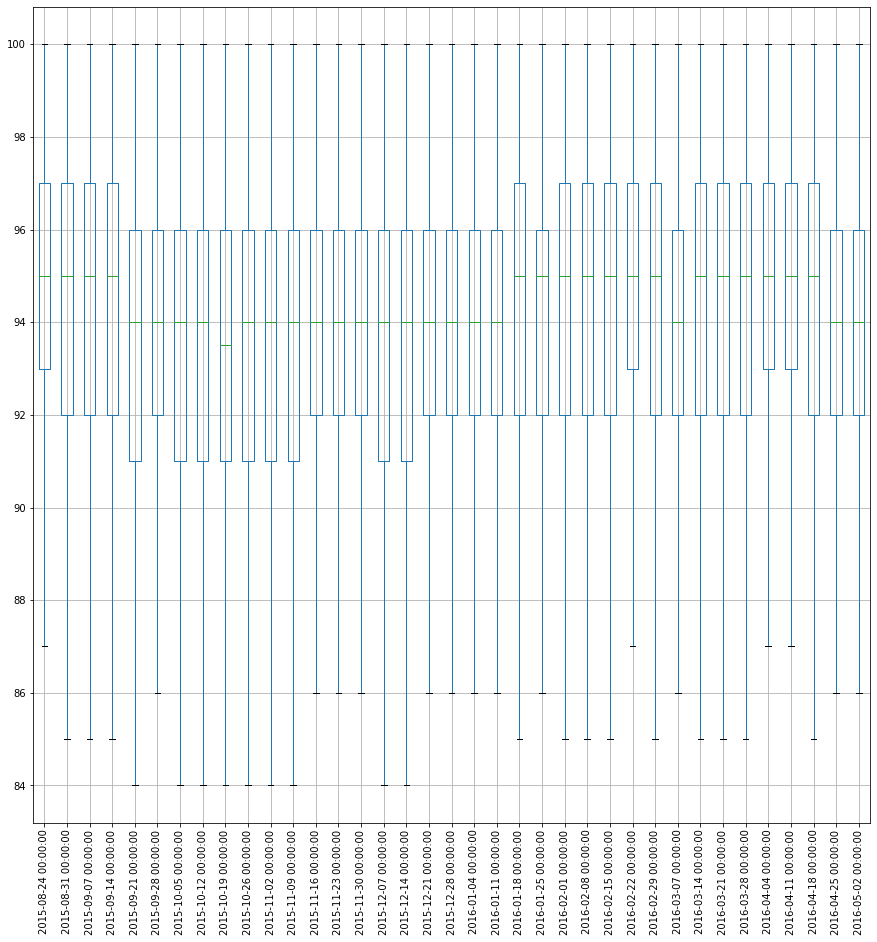

In [17]:
y.boxplot(showfliers = False, figsize= (15, 15))
plt.xticks(rotation=90)

## Histograms by day of week
there doesn't seem to be any change in average efficiency on weekdays vs. weekends, although saturday and sunday (as well as thursday) do have a wider distribution of efficiencies.

In [18]:
df['dayofweek']= pd.to_datetime(df['dataDate']).dt.day_name()

In [19]:
x =df.pivot(columns='dayofweek', values='efficiency')

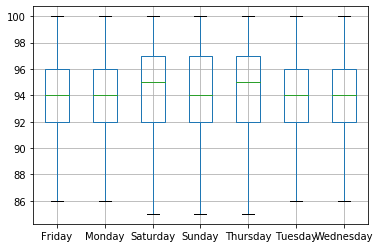

In [20]:
x.boxplot(showfliers=False)

In [21]:
df

,idStudy,participID,dataDate,dataTime,fetchStamp,overallResultValue,heartMinsFound,sleepMinsFound,calMinsFound,stepMinsFound,...,efficiency,restlessCount,durationMS,restlessDuration,awakeCount,minutesAfterWakeup,month,calc,week_start,dayofweek
0,6178,3LZGLG,2015-08-25,00:00:00,1441145130,3,1331,440,1440,1440,...,97,10,26400000,16,1,0,08,0.967963,2015-08-24,Tuesday
1,6179,3LZGLG,2015-08-26,00:00:00,1441145132,3,1424,434,1440,1440,...,96,8,26040000,16,1,0,08,0.963048,2015-08-24,Wednesday
2,6180,3LZGLG,2015-08-27,00:00:00,1441145134,3,1412,469,1440,1440,...,95,12,28140000,36,1,11,08,0.947253,2015-08-24,Thursday
3,6181,3LZGLG,2015-08-28,00:00:00,1441145136,3,1350,354,1440,1440,...,97,8,21240000,14,1,0,08,0.974138,2015-08-24,Friday
4,6182,3LZGLG,2015-08-29,00:00:00,1441145138,3,1417,502,1440,1440,...,90,16,26100000,51,2,0,08,0.897375,2015-08-24,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39459,109693,4GM577,2016-05-02,00:00:00,1462336876,3,1376,421,1440,1440,...,91,18,25260000,33,1,0,05,0.914489,2016-05-02,Monday
39460,110680,4GM577,2016-05-03,00:00:00,1462509302,3,1306,418,1440,1440,...,91,17,25080000,37,2,0,05,0.906699,2016-05-02,Tuesday
39461,110681,4GM577,2016-05-04,00:00:00,1462509306,3,1318,702,1440,1440,...,89,22,42120000,40,7,0,05,0.886040,2016-05-02,Wednesday
39462,111759,4GM577,2016-05-05,00:00:00,1462767919,2,1268,410,1440,1440,...,93,16,24600000,30,0,3,05,0.933661,2016-05-02,Thursday


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37]), <a list of 37 Text xticklabel objects>)

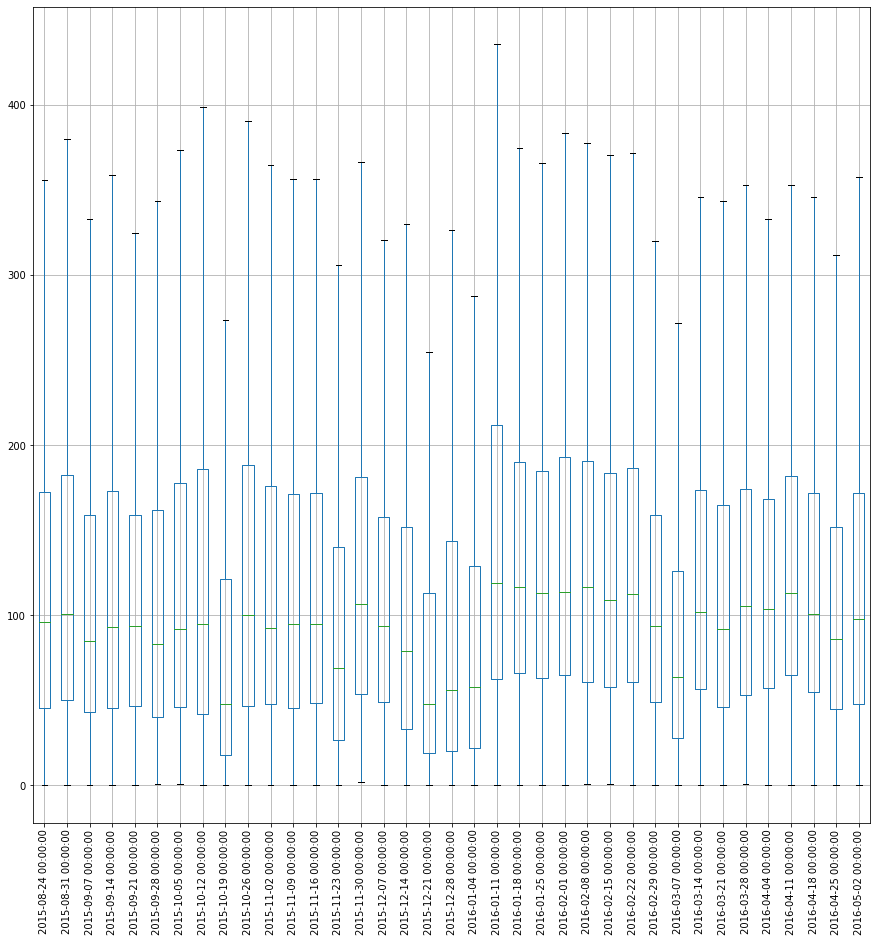

In [22]:
z = df.pivot(columns='week_start', values='fatBurnMins')
z.boxplot(showfliers = False, figsize= (15, 15))
plt.xticks(rotation=90)

In [23]:
A = df["fatBurnMins"] ## X usually means our input variables (or independent variables)
B = df["efficiency"] ## Y usually means our output/dependent variable
A = sm.add_constant(A) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(B, A).fit() ## sm.OLS(output, input)
#predictions = model.predict(A)

# Print out the statistics
model.summary()

/Users/mollygiglia/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             efficiency   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01712
Date:                Wed, 01 Apr 2020   Prob (F-statistic):              0.896
Time:                        21:00:05   Log-Likelihood:            -1.0719e+05
No. Observations:               33339   AIC:                         2.144e+05
Df Residuals:                   33337   BIC:                         2.144e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          93.5280      0.050   1871.149      0.000      93.430      93.626
fatBurnMins   3.97e-05      0.000      0.131      0.896      -0.001       0.001
==============================================================================
Omnibus:                    43171.777   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9962519.149
Skew:                          -7.218   Prob(JB):                         0.00
Kurtosis:                      86.447   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df.week_start.unique()

array(['2015-08-24T00:00:00.000000000', '2015-08-31T00:00:00.000000000',
       '2015-09-07T00:00:00.000000000', '2015-09-14T00:00:00.000000000',
       '2015-09-21T00:00:00.000000000', '2015-09-28T00:00:00.000000000',
       '2015-10-05T00:00:00.000000000', '2015-10-12T00:00:00.000000000',
       '2015-10-19T00:00:00.000000000', '2015-10-26T00:00:00.000000000',
       '2015-11-02T00:00:00.000000000', '2015-11-09T00:00:00.000000000',
       '2015-11-16T00:00:00.000000000', '2015-11-23T00:00:00.000000000',
       '2015-11-30T00:00:00.000000000', '2015-12-07T00:00:00.000000000',
       '2015-12-14T00:00:00.000000000', '2015-12-21T00:00:00.000000000',
       '2015-12-28T00:00:00.000000000', '2016-01-04T00:00:00.000000000',
       '2016-01-11T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
       '2016-01-25T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-02-08T00:00:00.000000000', '2016-02-15T00:00:00.000000000',
       '2016-02-22T00:00:00.000000000', '2016-02-29

In [25]:
before = df[df['week_start'] == '2015-08-24T00:00:00.000000000']['efficiency']
after = df[df['week_start'] == '2015-10-19T00:00:00.000000000']['efficiency']

In [118]:
before

0        97
1        96
2        95
3        97
4        90
         ..
32664    94
32665    93
32666    92
33314    97
33315    97
Name: efficiency, Length: 667, dtype: int64

In [26]:
ttest,pval = stats.ttest_ind(before, after)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.00016284569459524696
reject null hypothesis


In [142]:
grouped = df.groupby(['participID', 'week_start'], as_index=False)['efficiency'].mean()

In [143]:
a = grouped.groupby('participID', as_index=False).count().sort_values(by='week_start')
a[a['week_start']>29]['participID']

154    3QQQC4
25     3MBWWX
116    3NDT7M
149    3P64V9
127    3NRZSK
        ...  
138    3P2SYM
137    3P2SHF
136    3NZRMJ
79     3N2WQW
0      3LZGLG
Name: participID, Length: 131, dtype: object

In [73]:
#195 participants
#68 have all 37 weeks of data
#91 have 36 or higher
#107 have 35 or higher
#118 have 34 or higher
#131 have 30 or more weeks of data

In [105]:
grouped = grouped[grouped['participID'].isin(a[a['week_start']==37]['participID'])]
# 68 subjects
grouped

,participID,week_start,efficiency
0,3LZGLG,2015-08-24,95.500000
1,3LZGLG,2015-08-31,96.142857
2,3LZGLG,2015-09-07,97.142857
3,3LZGLG,2015-09-14,95.428571
4,3LZGLG,2015-09-21,96.714286
...,...,...,...
5145,3PJ5MT,2016-04-04,93.666667
5146,3PJ5MT,2016-04-11,94.000000
5147,3PJ5MT,2016-04-18,93.285714
5148,3PJ5MT,2016-04-25,94.285714


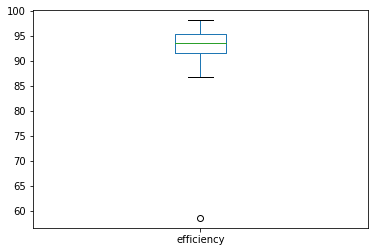

In [140]:
grouped[grouped['week_start'] == '2015-10-12T00:00:00.000000000'].efficiency.plot(kind='box')

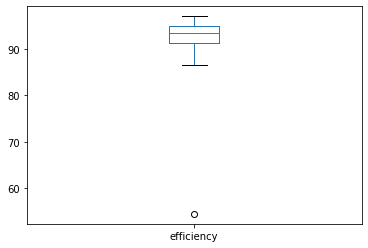

In [141]:
grouped[grouped['week_start'] == '2015-10-19T00:00:00.000000000'].efficiency.plot(kind='box')

In [133]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.05:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [139]:
weeks = grouped.week_start.unique()
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = grouped[grouped['week_start'] == weeks[index]].efficiency
        next_week = grouped[grouped['week_start'] == weeks[index+1]].efficiency
        paired_t_test(this_week, next_week)

2015-08-31T00:00:00.000000000
2015-09-07T00:00:00.000000000
2015-09-14T00:00:00.000000000
2015-09-21T00:00:00.000000000
2015-09-28T00:00:00.000000000
2015-10-05T00:00:00.000000000
2015-10-12T00:00:00.000000000
2015-10-19T00:00:00.000000000
reject null hypothesis
2015-10-26T00:00:00.000000000
2015-11-02T00:00:00.000000000
2015-11-09T00:00:00.000000000
2015-11-16T00:00:00.000000000
2015-11-23T00:00:00.000000000
2015-11-30T00:00:00.000000000
2015-12-07T00:00:00.000000000
2015-12-14T00:00:00.000000000
2015-12-21T00:00:00.000000000
2015-12-28T00:00:00.000000000
2016-01-04T00:00:00.000000000
2016-01-11T00:00:00.000000000
2016-01-18T00:00:00.000000000
2016-01-25T00:00:00.000000000
2016-02-01T00:00:00.000000000
2016-02-08T00:00:00.000000000
2016-02-15T00:00:00.000000000
2016-02-22T00:00:00.000000000
2016-02-29T00:00:00.000000000
2016-03-07T00:00:00.000000000
2016-03-14T00:00:00.000000000
reject null hypothesis
2016-03-21T00:00:00.000000000
2016-03-28T00:00:00.000000000
2016-04-04T00:00:00.0000